[*********************100%%**********************]  1 of 1 completed

Mean Squared Error: 7488.112092821172
R^2 Score: 0.3417930602177628


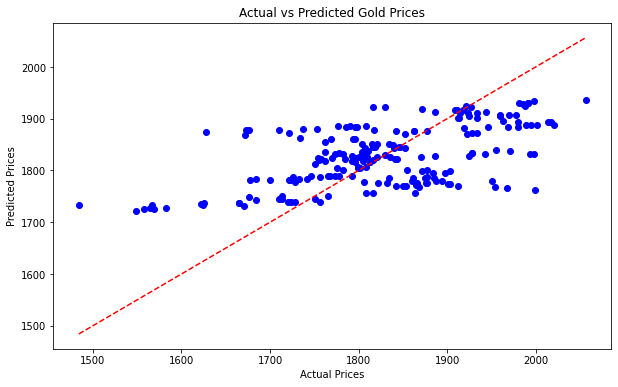

Historical gold prices saved as 'gold_prices_yahoo_finance.csv'


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch historical gold price data from Yahoo Finance
ticker = 'GC=F'
gold_data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Preprocess the data
gold_data.reset_index(inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

# Define features and target variable
X = gold_data[['Day', 'Month', 'Year']]
y = gold_data['Close']  # 'Close' is the gold price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Gold Prices')
plt.show()

# Save the data to a CSV file (optional)
# gold_data.to_csv('gold_prices_yahoo_finance.csv', index=False)
# print("Historical gold prices saved as 'gold_prices_yahoo_finance.csv'")


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 426.0011737871765
R^2 Score: 0.9564128389306195


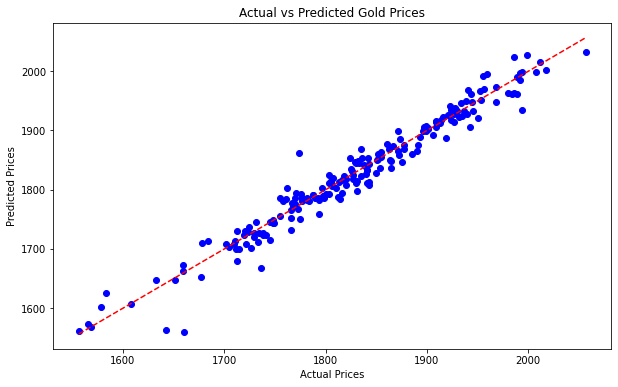

Historical gold prices saved as 'gold_prices_yahoo_finance.csv'


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch historical gold price data from Yahoo Finance
ticker = 'GC=F'
gold_data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Preprocess the data
gold_data.reset_index(inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

# Create lagged features
gold_data['Lag1'] = gold_data['Close'].shift(1)
gold_data['Lag2'] = gold_data['Close'].shift(2)
gold_data = gold_data.dropna()

# Define features and target variable
features = ['Day', 'Month', 'Year', 'Lag1', 'Lag2']
X = gold_data[features]
y = gold_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Gold Prices')
plt.show()

# Save the data to a CSV file (optional)
gold_data.to_csv('gold_prices_yahoo_finance.csv', index=False)
print("Historical gold prices saved as 'gold_prices_yahoo_finance.csv'")


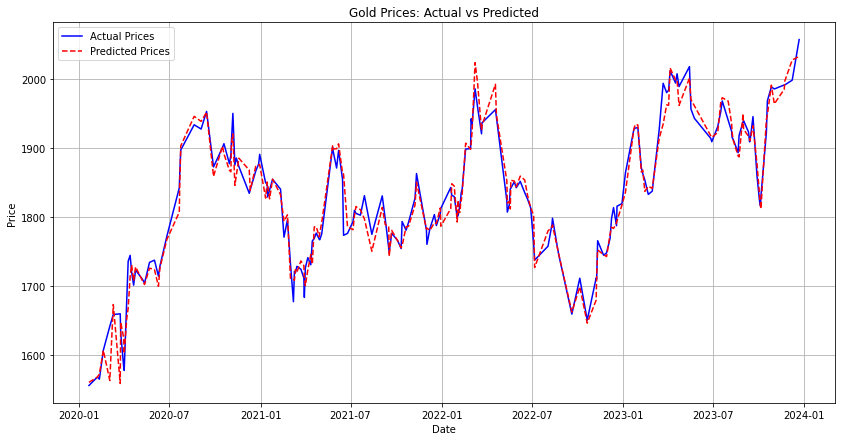

In [4]:
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, gold_data['Date'], test_size=0.2, random_state=42
)
results = pd.DataFrame({
    'Date': date_test,
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values('Date')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Prices', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
from datetime import datetime

# Predict gold price for today
today = datetime.now().date()
latest_data = gold_data[gold_data['Date'] == gold_data['Date'].max()]

# Prepare data for prediction
latest_features = {
    'Day': today.day,
    'Month': today.month,
    'Year': today.year,
    'Lag1': latest_data['Close'].values[0] if not latest_data.empty else np.nan,
    'Lag2': gold_data['Close'].shift(1).dropna().iloc[-1] if len(gold_data) > 1 else np.nan
}

latest_df = pd.DataFrame([latest_features])
latest_price_prediction = model.predict(latest_df)

print(f'The predicted gold price for today ({today}) is ${latest_price_prediction[0]:.2f}')

The predicted gold price for today (2024-07-23) is $2059.79


In [10]:
import yfinance as yf
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Fetch historical gold price data
ticker = 'GC=F'
gold_data = yf.download(ticker, start='2022-01-01', end='2024-07-23')

# Preprocess the data
gold_data.reset_index(inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

# Create lagged features
gold_data['Lag1'] = gold_data['Close'].shift(1)
gold_data['Lag2'] = gold_data['Close'].shift(2)
gold_data = gold_data.dropna()

# Define features and target variable
features = ['Day', 'Month', 'Year', 'Lag1', 'Lag2']
X = gold_data[features]
y = gold_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, gold_data['Date'], test_size=0.2, random_state=42
)

# Initialize and train the model
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict the gold price for today
today = datetime.now().date()
latest_data = gold_data[gold_data['Date'] == gold_data['Date'].max()]

# Prepare data for prediction
latest_features = {
    'Day': today.day,
    'Month': today.month,
    'Year': today.year,
    'Lag1': latest_data['Close'].values[0] if not latest_data.empty else np.nan,
    'Lag2': gold_data['Close'].shift(1).dropna().iloc[-1] if len(gold_data) > 1 else np.nan
}

latest_df = pd.DataFrame([latest_features])
latest_price_prediction = model.predict(latest_df)

print(f'The predicted gold price for today ({today}) is ${latest_price_prediction[0]:.2f}')


[*********************100%%**********************]  1 of 1 completed

Mean Squared Error: 486.2012050159974
R^2 Score: 0.9867049796507132
The predicted gold price for today (2024-07-23) is $2346.03


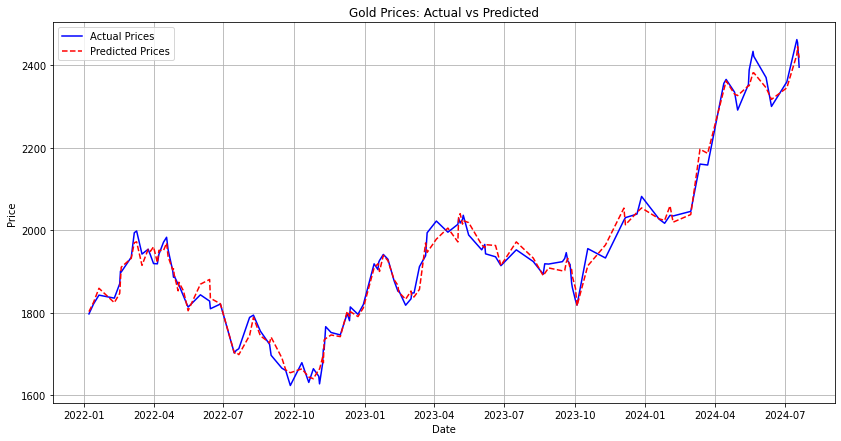

In [11]:

results = pd.DataFrame({
    'Date': date_test,
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values('Date')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Prices', color='blue')
plt.plot(results['Date'], results['Predicted'], label='Predicted Prices', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta

# Fetch historical gold price data
ticker = 'GC=F'
gold_data = yf.download(ticker, start='2020-01-01', end='2024-07-24')

# Preprocess the data
gold_data.reset_index(inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

# Create lagged features
gold_data['Lag1'] = gold_data['Close'].shift(1)
gold_data['Lag2'] = gold_data['Close'].shift(2)
gold_data = gold_data.dropna()

# Define features and target variable
features = ['Day', 'Month', 'Year', 'Lag1', 'Lag2']
X = gold_data[features]
y = gold_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:-10], X[-10:], y[:-10], y[-10:]

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict for the last 10 days
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict future prices (next 10 days)
last_date = gold_data['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 11)]

# Prepare data for future predictions
future_features = []
for date in future_dates:
    features = {
        'Day': date.day,
        'Month': date.month,
        'Year': date.year,
        'Lag1': gold_data['Close'].iloc[-1],  # Assuming the latest close price
        'Lag2': gold_data['Close'].shift(1).iloc[-1]  # Previous day's close price
    }
    future_features.append(features)

future_df = pd.DataFrame(future_features)
future_predictions = model.predict(future_df)

print("Future Predictions:")
for date, prediction in zip(future_dates, future_predictions):
    print(f'{date.date()}: ${prediction:.2f}')

# Note: You need actual future prices to compare accuracy
# You can fetch actual prices manually or wait until they become available


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 1685.798003786032
R^2 Score: -1.1287198682560864
Future Predictions:
2024-07-24: $2375.15
2024-07-25: $2375.15
2024-07-26: $2374.66
2024-07-27: $2374.76
2024-07-28: $2374.87
2024-07-29: $2374.87
2024-07-30: $2375.01
2024-07-31: $2375.01
2024-08-01: $2387.53
2024-08-02: $2387.53


In [15]:
import yfinance as yf
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Fetch historical gold price data
ticker = 'GC=F'
gold_data = yf.download(ticker, start='2022-01-01', end='2024-07-23')

# Preprocess the data
gold_data.reset_index(inplace=True)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year

# Create lagged features and additional features
gold_data['Lag1'] = gold_data['Close'].shift(1)
gold_data['Lag2'] = gold_data['Close'].shift(2)
gold_data['MovingAvg7'] = gold_data['Close'].rolling(window=7).mean()
gold_data['MovingAvg30'] = gold_data['Close'].rolling(window=30).mean()
gold_data = gold_data.dropna()

# Define features and target variable
features = ['Day', 'Month', 'Year', 'Lag1', 'Lag2', 'MovingAvg7', 'MovingAvg30']
X = gold_data[features]
y = gold_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict the gold price for today
today = datetime.now().date()
latest_data = gold_data[gold_data['Date'] == gold_data['Date'].max()]

# Prepare data for prediction
latest_features = {
    'Day': today.day,
    'Month': today.month,
    'Year': today.year,
    'Lag1': latest_data['Close'].values[0] if not latest_data.empty else np.nan,
    'Lag2': gold_data['Close'].shift(1).dropna().iloc[-1] if len(gold_data) > 1 else np.nan,
    'MovingAvg7': gold_data['Close'].rolling(window=7).mean().iloc[-1],
    'MovingAvg30': gold_data['Close'].rolling(window=30).mean().iloc[-1]
}

latest_df = pd.DataFrame([latest_features])
latest_price_prediction = best_model.predict(latest_df)

print(f'The predicted gold price for today ({today}) is ${latest_price_prediction[0]:.2f}')


[*********************100%%**********************]  1 of 1 completed


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error: 403.31045140459287
R^2 Score: 0.9896988150184978
The predicted gold price for today (2024-07-23) is $2368.29


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Mean Squared Error: 33596915.851361476
R^2 Score: 0.7835929767120722


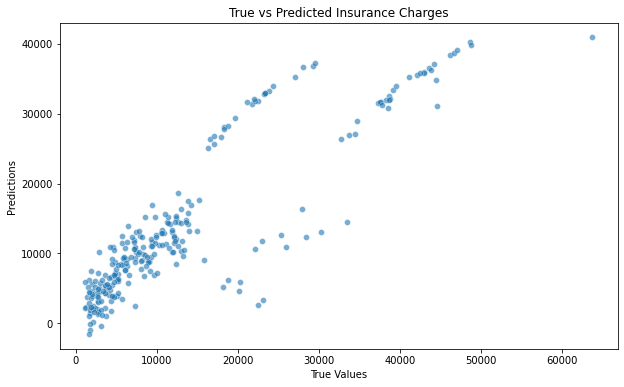

Sample Prediction: [8969.55027444]


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# url = 'https://www.kaggle.com/datasets/mirichoi0218/insurance/download'
# df = pd.read_csv(url)

df = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
print(df.head())

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split data into features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Insurance Charges')
plt.show()

# Save and load the model
import joblib
joblib.dump(model, 'insurance_regression_model.joblib')
loaded_model = joblib.load('insurance_regression_model.joblib')

# Example of using the loaded model
sample_data = X_test_scaled[0:1]
sample_prediction = loaded_model.predict(sample_data)
print(f'Sample Prediction: {sample_prediction}')

In [ ]:
pd.